In [2]:
import numpy as numpy
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

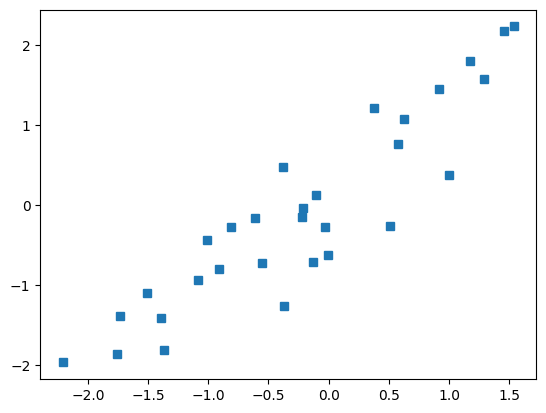

In [260]:
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,"s")

In [261]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [262]:
lr = .05
lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(), lr=lr)

In [263]:
numepochs = 500
losses = torch.zeros(numepochs)

for epoch in range(numepochs):
    # forward pass
    y_pred = ANNreg(x)
    
    # Compute Loss
    loss = lossfun(y_pred, y)
    losses[epoch] = loss # Just saving for look after
    
    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

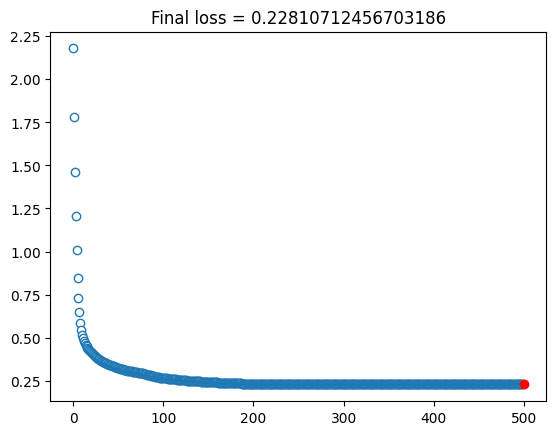

In [264]:
y_pred = ANNreg(x)

testloss = (y_pred-y).pow(2).mean()

plt.plot(losses.detach(),"o", markerfacecolor="w", linewidth=.01)
plt.plot(numepochs, testloss.detach(), "ro")
plt.title(f"Final loss = {testloss.item()}")
plt.show()

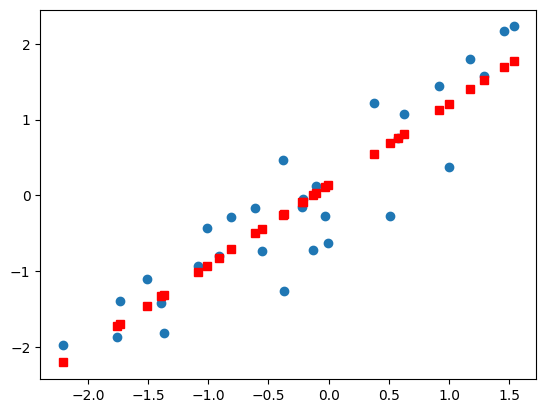

In [265]:
plt.plot(x,y, "o", label="Real Data")
plt.plot(x, y_pred.detach(), "rs")

## Code Challenge

In [266]:
def ex1(x,y, epochs, lr):
    ANNreg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=lr)
    lossfun = nn.MSELoss()
    losses = torch.zeros(epochs)
    
    for epoch in range(epochs):
        # foward pass
        y_pred = ANNreg(x)
        
        # Registering loss
        loss = lossfun(y_pred,y)
        losses[epoch] = loss
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return ANNreg(x), losses

pred1, losses = ex1(x,y,500, lr)

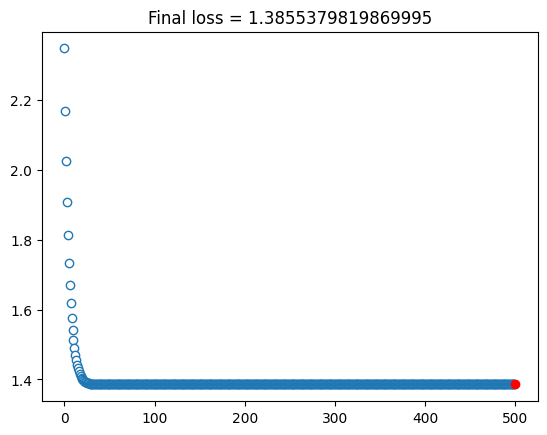

In [267]:


testloss = (pred1-y).pow(2).mean()

plt.plot(losses.detach(),"o", markerfacecolor="w", linewidth=.01)
plt.plot(numepochs, testloss.detach(), "ro")
plt.title(f"Final loss = {testloss.item()}")
plt.show()

In [268]:
def ex2(N, scaler):
    x = torch.randn(N)
    y = scaler*x + torch.randn(N)/2
    return x, y

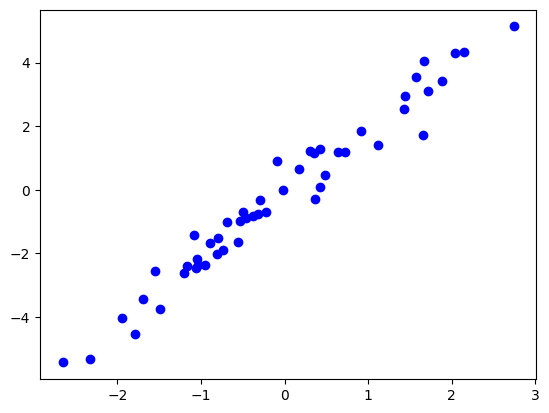

In [269]:
x,y = ex2(50,2)
plt.plot(x,y, "bo")

In [270]:
listx = torch.zeros(50,21,50)
listy = torch.zeros(50,21,50)

for i in range(50):
    ii = 0
    for j in torch.linspace(-2,2,21):
        x,y = ex2(50,j)
        listx[i][ii] = x
        listy[i][ii] = y
        ii +=1

In [271]:
list_pred = torch.zeros(50,21, 50)
list_losses = torch.zeros(50,21,500)
for i in range(50):
    for j in range(21):
        y_pred, losses = ex1(listx[i][j].view(-1,1), listy[i][j].view(-1,1), 500, 0.1)
        list_pred[i][j] = y_pred.detach().squeeze()
        list_losses[i][j] = losses.detach()

In [272]:
list_accuracy = torch.zeros(50,21,1)

for i in range(50):
    for j in range(21):
        list_accuracy[i][j] = torch.mean((list_pred[i][j] - listy[i,j])**2)
        

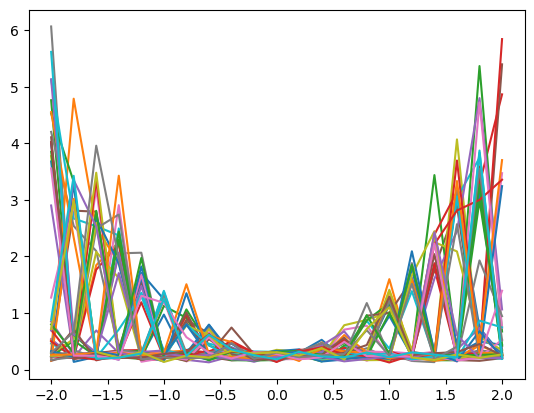

In [275]:
for i in range(50):
    plt.plot(torch.linspace(-2,2,21), list_accuracy[i])
    
plt.show()

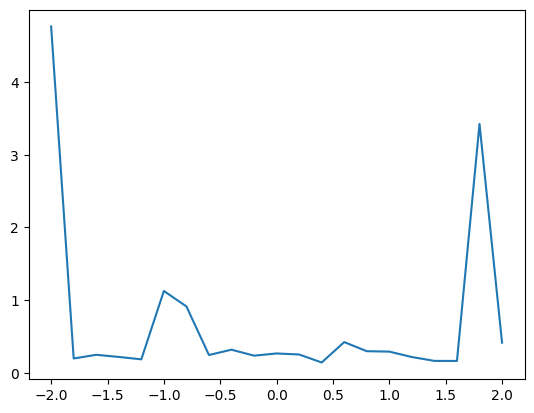

In [278]:
plt.plot(torch.linspace(-2,2,21), list_accuracy[2])

In [279]:
import numpy as np

## ANN for classify

In [35]:
nPerCluster = 100
blur = 1

A = [1,1]
B = [5,1]

# generate data
a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster)*blur]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster)*blur]


In [36]:
labels_np = np.vstack((np.zeros((nPerCluster,1)),np.ones((nPerCluster,1))))
labels_np

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [37]:
data_np = np.hstack((a,b)).T
data_np

array([[ 1.42101892e+00,  8.87054180e-01],
       [ 1.11831536e+00,  1.68493521e+00],
       [ 1.30758702e-01,  1.54501071e+00],
       [-1.69980157e-01, -2.27469846e-02],
       [-3.83766492e-01,  1.28725676e+00],
       [ 8.00870123e-01,  1.89785120e+00],
       [ 1.88950548e+00,  9.11519412e-01],
       [-6.37605698e-01,  2.72923194e+00],
       [ 1.18503143e+00,  8.09800607e-01],
       [ 4.27437645e-01,  6.12212361e-01],
       [ 1.73378241e+00,  9.48110780e-01],
       [ 1.35383915e+00, -2.61098410e-01],
       [-1.84181717e-01,  2.30642572e+00],
       [ 2.39758158e+00,  4.51431558e-01],
       [ 5.00269768e-01,  6.91751924e-01],
       [ 1.45600319e+00,  7.00938605e-01],
       [ 1.31848303e+00, -2.31850566e-01],
       [ 1.44518280e-01,  1.61953710e+00],
       [ 1.67357996e+00,  1.81229023e+00],
       [ 7.65572046e-01,  2.88815554e+00],
       [ 2.14946016e+00,  1.28113421e+00],
       [ 7.23231158e-01,  1.02769354e+00],
       [ 1.07719146e+00,  1.48262130e+00],
       [ 2.

In [38]:
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

In [39]:
data.shape

torch.Size([200, 2])

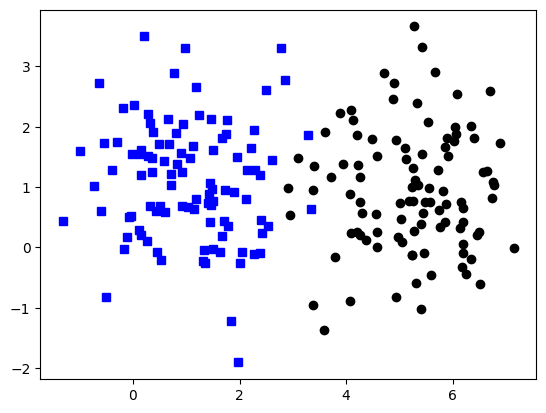

In [40]:
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs")
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko")

In [41]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [42]:
lr = 0.1
lossfun = nn.BCELoss()

optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=lr)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [43]:
epochs = 3000
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # foward pass
    y_pred = ANNclassify(data)
    
    # compute loss
    loss = lossfun(y_pred, labels)
    losses[epoch] = loss
    
    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

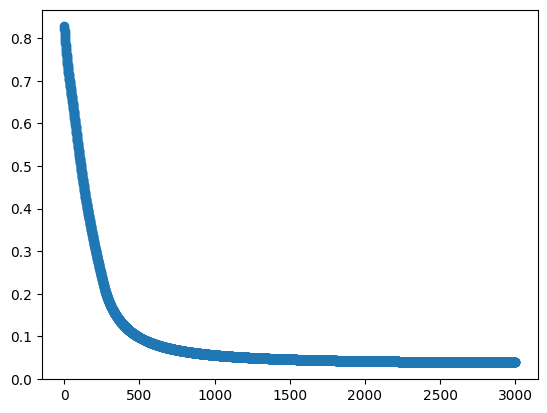

In [44]:
plt.plot(losses.detach(),"o")

In [50]:
y_pred = ANNclassify(data)

pred_labels = y_pred>.5

mis = np.where(pred_labels != labels)[0]

acc = 100-100*len(mis)/(2*nPerCluster)
acc

97.5

In [67]:
def createANNmodel(lr):
    
    ANNclassify = nn.Sequential(
        nn.Linear(2,1),
        nn.ReLU(),
        nn.Linear(1,1),
    )
    
    lossfun = nn.BCEWithLogitsLoss()
    
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=lr)
    return ANNclassify, lossfun, optimizer

In [68]:
epochs = 1000
def trainModel(ANN):
    losses = torch.zeros(epochs)
    
    for epoch in range(epochs):
    
        y_pred = ANN(data)
    
        loss = lossfun(y_pred, labels)
        losses[epoch] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANN(data)
    
    totalacc = 100*torch.mean(((predictions>0) == labels).float())
    
    return losses, predictions, totalacc

ann, lossfun, optimizer = createANNmodel(0.09)
_, op1, op2 = trainModel(ann)
op2
         

tensor(97.5000)

In [72]:
learningrates = np.linspace(.001,.1,50)

accByLR = []
allLosses = np.zeros((len(learningrates), epochs))

for i, lr in enumerate(learningrates):
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    
    losses,preds, acc = trainModel(ANNclassify)
    
    accByLR.append(acc)
    allLosses[i,:] = losses.detach()


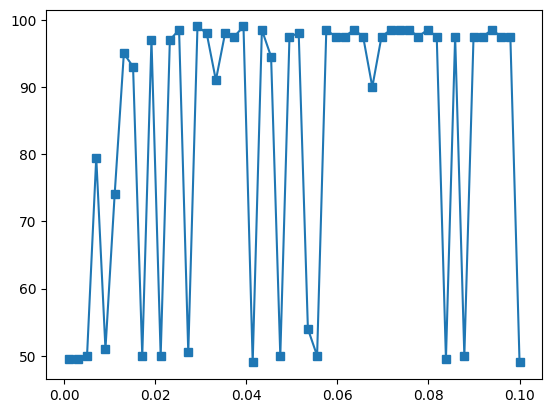

In [73]:
plt.plot(learningrates, accByLR, "s-")

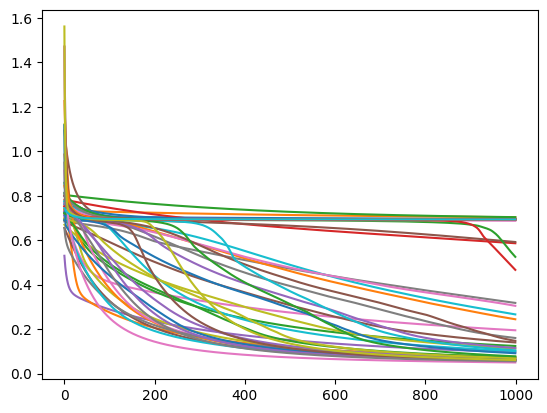

In [76]:
plt.plot(allLosses.T)